# Werkcollege Classical Mechanics b, serie 6 

In [1]:
import numpy as np
from matplotlib import pyplot as plt
from scipy.constants import g
%matplotlib inline

plt.style.use(['science', 'grid'])

In [2]:
# voor de differentiaalvergelijking ydot = f(t, y) (zie vergelijking 9 in de opdracht),
# geef de volgende waarde van y voor gegeven y en t,
# gebruik makend van de vierde orde Runge-Kutta methode met stapgrootte h
def runge_kutta(f, t, y, h):
    k1 = f(t, y)
    k2 = f(t + h / 2.0, y + h * k1 / 2.0)
    k3 = f(t + h / 2.0, y + h * k2 / 2.0)
    k4 = f(t + h, y + h * k3)
    return y + h * (k1 + 2.0 * k2 + 2.0 * k3 + k4) / 6.0

In [3]:
# plot het traject van de knikker en geef op elk punt (x, y) de snelheid weer door de kleur te varieren met een gradient
def plot_traject(x, y, snelheid, x_direction=False):
    f, ax = plt.subplots()
    
    # gebruik de volgende gradient: blauw -> geel -> rood
    cm = plt.cm.get_cmap('RdYlBu_r')    
    col = ax.scatter(x, y, c = snelheid, cmap = cm, lw = 0.0, marker=".")

    ax.set_xlabel('x (m)')
    ax.set_ylabel('y (m)')
    
    # laat een balk zien die de gradient weergeeft
    cbaxes = f.add_axes([0.85, 0.1, 0.03, 0.8])
    plt.colorbar(col, cax = cbaxes, label = 'Snelheid (m/s)' if not x_direction else 'Snelheid-x (m/s)')
    plt.subplots_adjust(bottom = 0.1, top = 0.9, left = 0.1, right = 0.77)

    ax.set_title('Traject van knikker over de baan')
    plt.show()

# Bewegingsplots
* Hoe snel moet het deeltje gaan om van $x=-10$ tot stilstand te komen in de oorsprong?
* Hoe snel moet een deeltje vanuit de oorsprong gaan om tot $y=10$ te komen

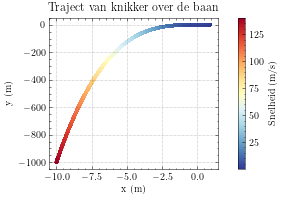

In [4]:
f = lambda t, vec: np.array([vec[1],-(18 * vec[0] ** 3 * vec[1] ** 2 + 3 * g * vec[0] ** 2) / (1 + 9 * vec[0] ** 4)])

h = 0.0001
dt = h

steps = 200000

x_initial = -10.
w_initial = 0.467

trace = np.zeros((steps, 3))
trace[0] = [
    x_initial,
    w_initial,
    0
] # x, w, t
for i in range(1, steps):
    trace[i][:2] = runge_kutta(f, trace[i-1][2], trace[i-1][:2], h)
    trace[i][2] = trace[i-1][2] + dt
    # if trace[i][1] < 0: break

plot_traject(trace[:, 0], trace[:, 0] ** 3, np.sqrt(trace[:, 1] ** 2 + (3 * trace[:, 0] ** 2 * trace[:,1]) ** 2))

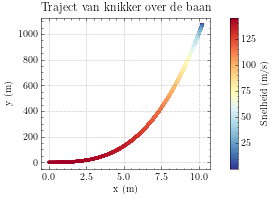

In [5]:
x_initial = 0.
w_initial = 145.

trace_2 = np.zeros((steps, 3))
trace_2[0] = [
    x_initial,
    w_initial,
    0
] # x, w, t
for i in range(1, steps):
    trace_2[i][:2] = runge_kutta(f, trace_2[i-1][2], trace_2[i-1][:2], h)
    trace_2[i][2] = trace_2[i-1][2] + dt
    # if trace_2[i][1] < 0: break

plot_traject(trace_2[:, 0], trace_2[:, 0] ** 3, np.sqrt(trace_2[:, 1] ** 2 + (3 * trace_2[:, 0] ** 2 * trace_2[:,1]) ** 2))

### Antwoord
De eerste figuur is voor de knikker die begint op $x=-10$. We zien dat deze een vrij lage beginsnelheid in de x-richting heeft, maar de de vorm van de curve is deze snelheid wel groot in de y-richting. Andersom zien we dat de tweede knikker die begint in $x=0$ een hoge snelheid in de x-richting heeft maar een lage snelheid in de y-richting.

De benodigde snelheden kunnen worden geschat door een integraal te nemen over $y_0$ tot $y_1$ over de kracht $F=mg$. Hieruit kan dan de beginsnelheid in de x-richting worden afgeleid.

De snelheden in de x-richting die we dna vinden zijn respectievelijk $w=0.467 m/s$ en $w=145 m/s$.

## Energieplots

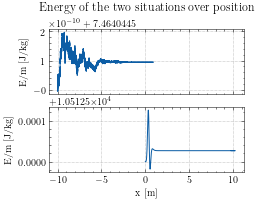

In [6]:
E = lambda trc: 0.5 * (trc[:, 1] ** 2 + (3 * trc[:, 0] ** 2 * trc[:, 1]) ** 2) + g * trc[:, 0] ** 3

fig, axs = plt.subplots(2, 1, sharex='col')

energy = E(trace[:])
energy2 = E(trace_2[:])

axs[0].set_title("Energy of the two situations over position\n")

axs[0].plot(trace[:, 0], energy)
axs[1].plot(trace_2[:, 0], energy2)

axs[0].set_ylabel('E/m [J/kg]')
axs[1].set_ylabel('E/m [J/kg]')
axs[1].set_xlabel('x [m]')
plt.show()

### Antwoord
We zien dat de constantheid van de energie erg afhangt van $w$. Wanneer $w$ klein is is de energie vrijwel geheel behouden, voor hoge waarden van $w$ niet. Dit heeft mogelijk te maken met dat de constraint ($y=x^3$) dan een grotere rol gaat spelen.

## Energieverlies

Wat is de minimale stapgrootte waarmee je nog steeds redelijke oplossing krijgt? Kwantificeer dit door voor drie stapgroottes te onderzoeken wat het energieverlies voor beide situaties. 

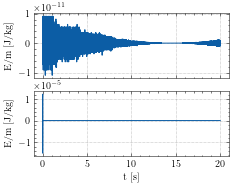

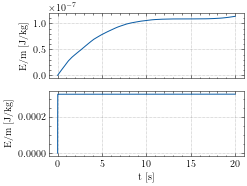

In [7]:
energy_loss = np.diff(energy)
energy_loss2 = np.diff(energy2)

fig, axs = plt.subplots(2, 1, sharex='col')

axs[0].plot(trace[:-1, 2], energy_loss)
axs[1].plot(trace_2[:-1, 2], energy_loss2)

axs[0].set_ylabel('E/m [J/kg]')
axs[1].set_ylabel('E/m [J/kg]')
axs[1].set_xlabel('t [s]')
plt.show()

energy_loss_cum = np.cumsum(np.abs(np.diff(energy)))
energy_loss_cum2 = np.cumsum(np.abs(np.diff(energy2)))

fig, axs = plt.subplots(2, 1, sharex='col')

axs[0].plot(trace[:-1, 2], energy_loss_cum)
axs[1].plot(trace_2[:-1, 2], energy_loss_cum2)

axs[0].set_ylabel('E/m [J/kg]')
axs[1].set_ylabel('E/m [J/kg]')
axs[1].set_xlabel('t [s]')
plt.show()

### Antwoord
Licht hier toe wat je ziet in de figuren, waarom dit relevant is en wat het doel is van deze plot.

## Einde
Dit is het einde van deze notebook, zorg ervoor dat je alle plots die je laat zien ook kwalitatief beschrijft. 

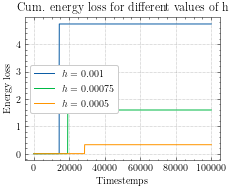

In [10]:
for h in [0.001, 0.00075, 0.0005]:
    dt = h

    steps = 100000

    x_initial = 10
    w_initial = 0

    trace = np.zeros((steps, 3))
    trace[0] = [
        x_initial,
        w_initial,
        0
    ] # x, w, t
    for i in range(1, steps):
        trace[i][:2] = runge_kutta(f, trace[i-1][2], trace[i-1][:2], h)
        trace[i][2] = trace[i-1][2] + dt
        
    loss = np.cumsum(np.abs(np.diff(E(trace))))
    
    plt.plot(loss, label=f'$h={h}$')

plt.legend()
plt.title('Cum. energy loss for different values of h')
plt.ylabel('Energy loss')
plt.xlabel('Timestemps')
plt.legend()
plt.show()

### Antwoord
We zien dat hoe kleiner de waarde van $h$ dat de energie loss kleiner wordt. Dit is zoals verwacht. We hebben de andere simulaties gerund met een $h=0.0001$. Gezien hoe klein het energie verlies is voor $h=0.0005$, namelijk $<<1$, concludeer ik dat de simulaties hierboven vrij accuraat zijn. Ik kan niet geheel verklaren waar de plotselinge spike vandaan komt. Ik vermoed, mede omdat het na andere hoeveelheid tijdstappen gebeurt, dat het te maken heeft met een bepaald punt. Mogelijk de oorsprong?